<a href="https://colab.research.google.com/github/Bmarchese/implementing-KNN/blob/main/KNearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from random import seed
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [23]:
class KNearestNeighbors:
    def __euclidean_distance(self, p, q):
       return np.sqrt(np.sum((p - q) ** 2))


    def __find_nearest_neighbors(self, X_train, y_train, x_new, k):
        distances = [(self.__euclidean_distance(x_new, x), y) for x, y in zip(X_train, y_train)]
        sorted_distances = sorted(distances, key=lambda d: d[0])
        return sorted_distances[:k]


    def __majority_vote(self, nearest_neighbors):
        votes = [label for _, label in nearest_neighbors]
        vote_counts = Counter(votes)
        return vote_counts.most_common(1)[0][0]


    def predict(self, X_train, y_train, x_new, k):
        nearest_neighbors = self.__find_nearest_neighbors(X_train, y_train, x_new, k)
        return self.__majority_vote(nearest_neighbors)


    def evaluate(self, X_train, y_train, X_test, y_test, k):
        num_correct = 0
        num_errors = 0
        # Classification
        for x_new, y_expected in zip(X_test, y_test):
            predicted_label = self.predict(X_train, y_train, x_new, k)
            if predicted_label == y_expected:
                num_correct += 1
            else:
                num_errors += 1
        # Accuracy
        total_samples = len(X_test)
        accuracy = (num_correct / total_samples) * 100
        # Imprimir estatísticas
        print("Correct:", num_correct)
        print("Errors:", num_errors)
        print("Accuracy:", accuracy, "%")

        return num_correct, num_errors, accuracy

    def compute_confusion_matrix(self, X_train, y_train, X_test, y_test, k):
        y_pred = [self.predict(X_train, y_train, x_new, k) for x_new in X_test]
        cm = confusion_matrix(y_test, y_pred)
        self.confusion_matrix_ = cm  # Armazena a matriz de confusão em um atributo

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()

In [24]:
iris_dataset = load_iris()

In [25]:
data = iris_dataset['data']
target = iris_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [26]:
knn = KNearestNeighbors()
knn.evaluate(X_train, y_train, X_test, y_test, 30)

Correct: 30
Errors: 0
Accuracy: 100.0 %


(30, 0, 100.0)

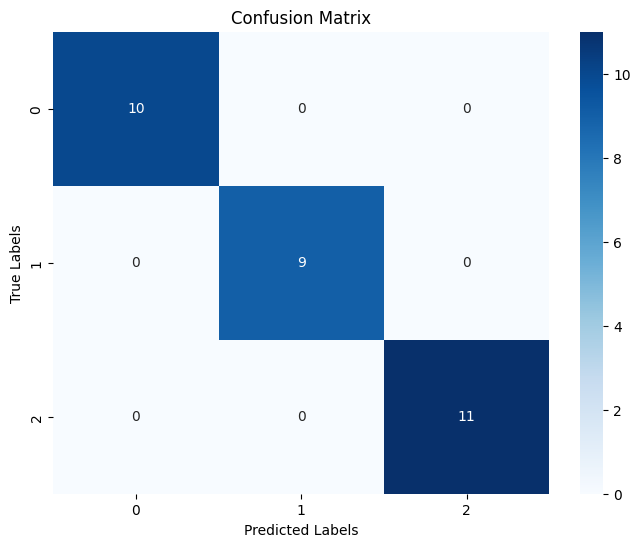

In [27]:
knn.compute_confusion_matrix(X_train, y_train, X_test, y_test, 1)